In [10]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def fetch_historical_data(ticker, start, end):
    """
    Fetch historical stock data for a given ticker symbol.
    
    Parameters:
    - ticker (str): Stock ticker symbol.
    - start (str): Start date in 'YYYY-MM-DD' format.
    - end (str): End date in 'YYYY-MM-DD' format.
    
    Returns:
    - prices (numpy.ndarray): Historical closing prices.
    """
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data['Close'].values

In [12]:
def calculate_mu_sigma(prices):
    """
    Calculate expected return (mu) and volatility (sigma) from historical prices.
    
    Parameters:
    - prices (numpy.ndarray): Historical closing prices.
    
    Returns:
    - mu (float): Expected daily return.
    - sigma (float): Daily volatility.
    """
    daily_returns = np.diff(prices) / prices[:-1]
    mu = np.mean(daily_returns)
    sigma = np.std(daily_returns)
    return mu, sigma

In [13]:
def simulate_stock_prices(initial_price, num_days, mu, sigma):
    """
    Simulate stock prices using a geometric Brownian motion model.
    
    Parameters:
    - initial_price (float): The starting price of the stock.
    - num_days (int): Number of days to simulate.
    - mu (float): Expected return.
    - sigma (float): Volatility.
    
    Returns:
    - prices (numpy.ndarray): Simulated stock prices.
    """
    prices = np.zeros(num_days)
    prices[0] = initial_price
    
    for t in range(1, num_days):
        dt = 1  # Time step
        random_change = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        prices[t] = prices[t - 1] * np.exp(random_change)
    
    return prices

In [16]:
def plot_prices(dates, prices, title):
    """
    Plot the simulated stock prices.
    
    Parameters:
    - dates (numpy.ndarray): Array of dates.
    - prices (numpy.ndarray): Simulated stock prices.
    - title (str): Title of the plot.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label='Prices', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

[*********************100%***********************]  1 of 1 completed


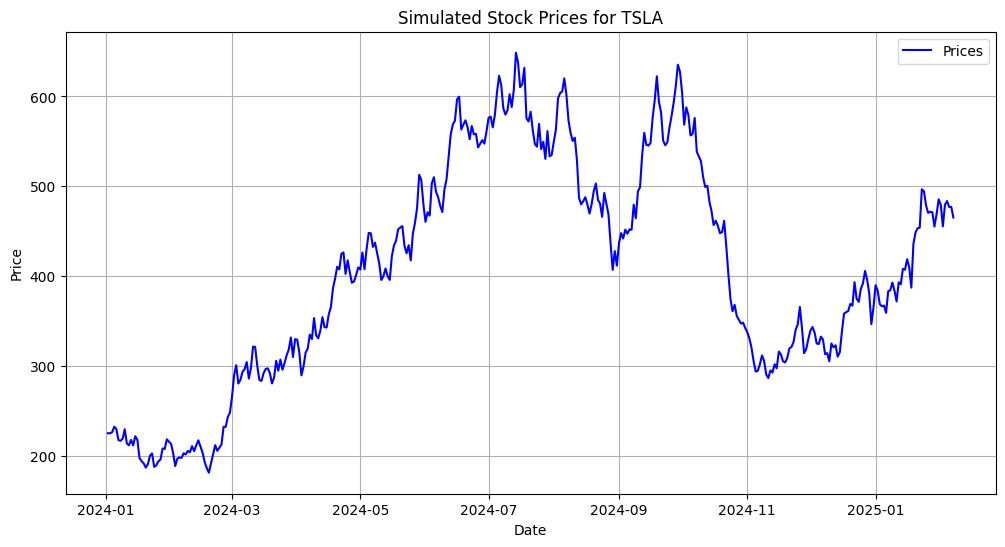

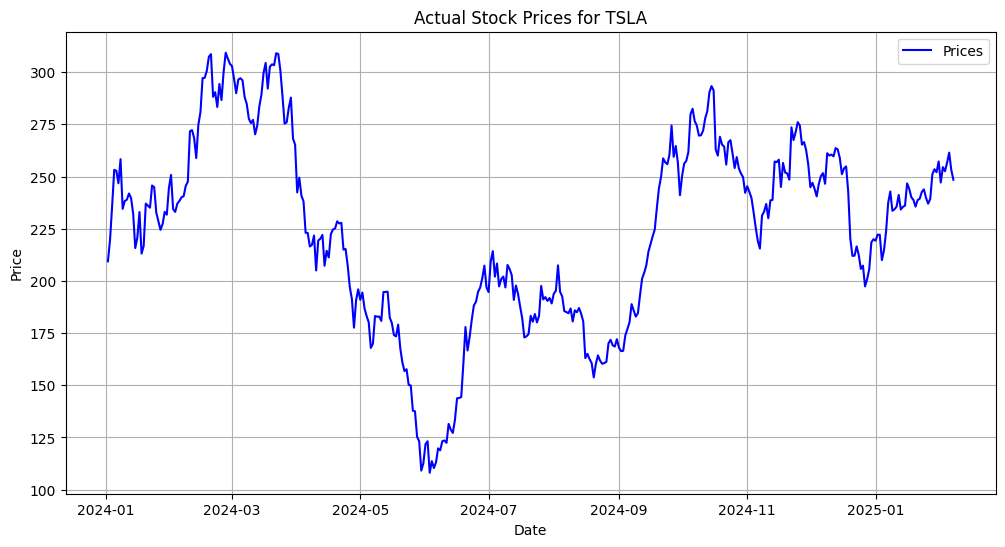

In [20]:
# Parameters
ticker = 'TSLA'  # Stock ticker
start_date = '2016-01-01'  # Historical data start date
end_date = '2024-01-01'  # Historical data end date
train_fraction = 0.8  # Fraction of data to use for training

# Fetch historical data
historical_prices = fetch_historical_data(ticker, start_date, end_date)

# Split data into train and test sets
train_size = int(len(historical_prices) * train_fraction)
train_prices = historical_prices[:train_size]
test_prices = historical_prices[train_size:]
num_days_to_simulate = len(test_prices)

# Calculate mu and sigma using training data
mu, sigma = calculate_mu_sigma(train_prices)

# Use the last price from the training set as the starting point
initial_price = train_prices[-1]

# Simulate future stock prices
dates = np.arange(np.datetime64(end_date) + np.timedelta64(1, 'D'), 
                  np.datetime64(end_date) + np.timedelta64(num_days_to_simulate + 1, 'D'))
simulated_prices = simulate_stock_prices(initial_price, num_days_to_simulate, mu, sigma)

# Plot the results
plot_prices(dates, simulated_prices, f'Simulated Stock Prices for {ticker}')
plot_prices(dates, test_prices, f'Actual Stock Prices for {ticker}')
